# 📊 売上データの可視化＆レポート自動作成ツール

Python × pandas × matplotlib を使って、  
**Excelの売上データから月別グラフ付きレポートを自動で作成するツール**です。

---

## 🛠 使用技術

- Python（Google Colab）
- pandas
- matplotlib
- openpyxl
- 日本語フォント（NotoSansJP）

---

## 📂 機能概要

- Excelファイル（sales_data.xlsx）を読み込む
- 月別売上を自動で集計
- 日本語対応の棒グラフを生成（タイトル・軸ラベル含む）
- Excelファイルに「元データ」＋「集計データ」シートとして出力
- グラフ画像（PNG）とExcelファイルを自動保存＆ダウンロード

---

## 📸 出力されるグラフ例

![グラフ画像](sales_chart.png)

---

## 💼 出力されるExcel例

- `売上レポート.xlsx`
  - シート1：「元データ」
  - シート2：「月別売上（合計）」

---

## 🚀 実行方法

1. Google Colab で `売上分析.ipynb` を開く
2. `sales_data.xlsx` をアップロード（例：月と売上の2列）
3. セルを順番に実行
4. グラフ画像とExcelレポートが自動生成され、ダウンロードされます

---

## 📁 ファイル構成



👉 Excelファイル（sales_data.xlsx）をアップロードしてください


Saving sales_data.xlsx to sales_data (1).xlsx


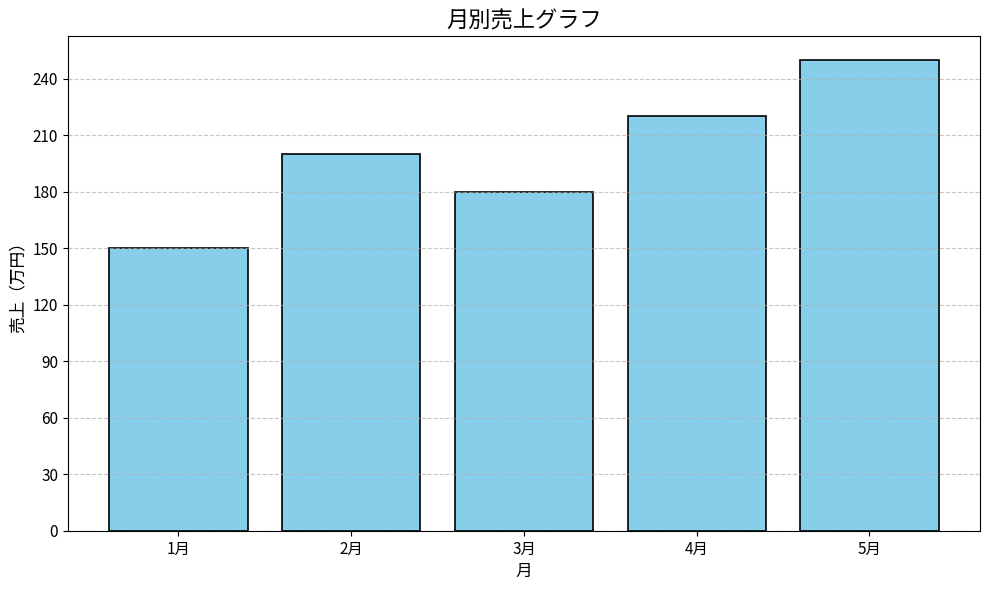

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# 📊 売上レポート自動生成ツール
# Author: 貴博 / Portfolio用サンプル

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
from google.colab import files
import matplotlib.ticker as ticker

# === フォント設定（日本語対応） ===
font_path = "/content/NotoSansJP-Regular.ttf"
jp_font = fm.FontProperties(fname=font_path)

# === ファイルアップロード ===
print("👉 Excelファイル（sales_data.xlsx）をアップロードしてください")
uploaded = files.upload()

# === データ読み込み ===
df = pd.read_excel("sales_data.xlsx")

# === 月別売上の集計 ===
monthly_sales = df.groupby("月")["売上"].sum()

# === グラフ描画 ===
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values,
        color="#87CEEB", edgecolor="black", linewidth=1.2)

plt.title("月別売上グラフ", fontproperties=jp_font, fontsize=16, weight="bold")
plt.xlabel("月", fontproperties=jp_font, fontsize=12)
plt.ylabel("売上（万円）", fontproperties=jp_font, fontsize=12)

plt.xticks(fontproperties=jp_font, fontsize=11)
plt.yticks(fontproperties=jp_font, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# === Excelレポート出力 ===
with pd.ExcelWriter("売上レポート.xlsx", engine="openpyxl") as writer:
    df.to_excel(writer, sheet_name="元データ", index=False)
    monthly_sales.to_frame(name="売上合計").to_excel(writer, sheet_name="月別売上")

# === ダウンロード実行 ===
files.download("売上レポート.xlsx")
files.download("sales_chart.png")


木崎/ Python初学者から実践スキル構築中 💪